<a href="https://colab.research.google.com/github/ElisabethDB/Eindopdracht-Deep-Learning/blob/main/4_Xception_De_Bock_Elisabeth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

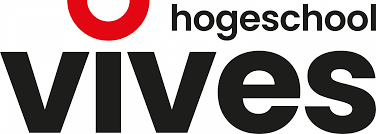<br>

**Deep Learning**<br>
Academiejaar 2022-2023<br>
De Bock Elisabeth

---

---


In [ ]:
#import libraries
import os, shutil, pathlib
import random
import math
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory

In [ ]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set the root directory where the images are stored
rootdir= './drive/MyDrive/schilderijen' 

In [ ]:
# Set the categories (i.e. classes) of images
categories = ['Rubens', 'Picasso', 'Mondriaan']

In [ ]:
def plot_accuracy_los(accuracy, val_accuracy, loss,val_loss):
    epochs = range(1, len(accuracy) + 1)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(epochs, accuracy, "b", label="Training accuracy")
    ax1.plot(epochs, val_accuracy, "r", label="Validation accuracy")
    ax1.set_title("Accuracy")
    ax1.legend();

    ax2.plot(epochs, loss, "b", label="Training loss")
    ax2.plot(epochs, val_loss, "r", label="Validation loss")
    ax2.set_title("Loss")
    ax2.legend();

In [ ]:
train_dataset = image_dataset_from_directory(
    os.path.join(rootdir, "train"),
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    os.path.join(rootdir, "validation"),
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    os.path.join(rootdir, "test"),
    image_size=(180, 180),
    batch_size=32)

Found 387 files belonging to 3 classes.
Found 300 files belonging to 3 classes.
Found 300 files belonging to 3 classes.


#Feature extraction met Xception

bron (https://www.tensorflow.org/api_docs/python/tf/keras/applications/xception/Xception)

In [ ]:
base_model = keras.applications.Xception(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(180, 180, 3),
    include_top=False,
)  # Do not include the ImageNet classifier at the top.


In [ ]:
# Freeze the base_model
base_model.trainable = False

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
# Pre-trained Xception weights requires that input be scaled
# from (0, 255) to a range of (-1., +1.), the rescaling layer
# outputs: `(inputs * scale) + offset`
scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
x = scale_layer(inputs)
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs, outputs)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 xception (Functional)       (None, 6, 6, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 3)                 6147      
                                                             

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
  )

In [ ]:
callbacks = [keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/MyDrive/schilderijen_app/modellen/Xception.keras",
    save_best_only=True,
    monitor="val_loss")]

In [ ]:
history = model.fit(
    train_dataset,
    epochs=40,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/40
13/13 [==============================] - 10s 360ms/step - loss: 0.8490 - accuracy: 0.6434 - val_loss: 0.5806 - val_accuracy: 0.7967
Epoch 2/40
13/13 [==============================] - 3s 216ms/step - loss: 0.5288 - accuracy: 0.8217 - val_loss: 0.4988 - val_accuracy: 0.8100
Epoch 3/40
13/13 [==============================] - 3s 218ms/step - loss: 0.4090 - accuracy: 0.8708 - val_loss: 0.4338 - val_accuracy: 0.8500
Epoch 4/40
13/13 [==============================] - 3s 219ms/step - loss: 0.3340 - accuracy: 0.8837 - val_loss: 0.3681 - val_accuracy: 0.8700
Epoch 5/40
13/13 [==============================] - 3s 183ms/step - loss: 0.2741 - accuracy: 0.9121 - val_loss: 0.3762 - val_accuracy: 0.8700
Epoch 6/40
13/13 [==============================] - 3s 221ms/step - loss: 0.2537 - accuracy: 0.9225 - val_loss: 0.3298 - val_accuracy: 0.8733
Epoch 7/40
13/13 [==============================] - 3s 215ms/step - loss: 0.2243 - accuracy: 0.9354 - val_loss: 0.3083 - val_accuracy: 0.8900
Epoch

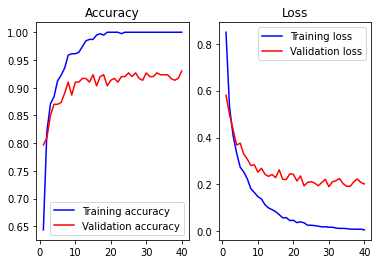

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plot_accuracy_los(accuracy, val_accuracy, loss,val_loss)

In [ ]:
model = keras.models.load_model("/content/drive/MyDrive/schilderijen_app/modellen/Xception.keras")
test_loss, test_acc = model.evaluate(test_dataset) 
print(f"Test accuracy: {test_acc:.3f}")

10/10 [==============================] - 2s 86ms/step - loss: 0.3532 - accuracy: 0.8767
Test accuracy: 0.877


# Feature extraction met Xception met data augementation

In [ ]:
base_model = keras.applications.Xception(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(180, 180, 3),
    include_top=False,
)  # Do not include the ImageNet classifier at the top.

In [ ]:
# Freeze the base_model
base_model.trainable = False

In [ ]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
])

In [ ]:
# Create new model on top
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)  # Apply random data augmentation
# Pre-trained Xception weights requires that input be scaled
# from (0, 255) to a range of (-1., +1.), the rescaling layer
# outputs: `(inputs * scale) + offset`
scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
x = scale_layer(x)
# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 xception (Functional)       (None, 6, 6, 2048)        20861480  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                           

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
  )

In [ ]:
callbacks = [keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/MyDrive/schilderijen_app/modellen/Xception met data augemtation.keras",
    save_best_only=True,
    monitor="val_loss")]

In [ ]:
history = model.fit(
    train_dataset,
    epochs=40,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/40
13/13 [==============================] - 7s 329ms/step - loss: 0.8700 - accuracy: 0.6202 - val_loss: 0.6597 - val_accuracy: 0.7100
Epoch 2/40
13/13 [==============================] - 3s 243ms/step - loss: 0.5806 - accuracy: 0.8036 - val_loss: 0.5446 - val_accuracy: 0.7933
Epoch 3/40
13/13 [==============================] - 3s 246ms/step - loss: 0.4856 - accuracy: 0.8295 - val_loss: 0.4400 - val_accuracy: 0.8200
Epoch 4/40
13/13 [==============================] - 3s 203ms/step - loss: 0.4274 - accuracy: 0.8372 - val_loss: 0.4430 - val_accuracy: 0.8467
Epoch 5/40
13/13 [==============================] - 4s 251ms/step - loss: 0.3892 - accuracy: 0.8734 - val_loss: 0.3810 - val_accuracy: 0.8567
Epoch 6/40
13/13 [==============================] - 3s 205ms/step - loss: 0.3327 - accuracy: 0.8941 - val_loss: 0.3885 - val_accuracy: 0.8400
Epoch 7/40
13/13 [==============================] - 3s 251ms/step - loss: 0.3194 - accuracy: 0.8786 - val_loss: 0.3363 - val_accuracy: 0.8633
Epoch 

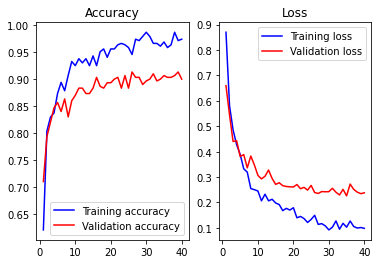

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plot_accuracy_los(accuracy, val_accuracy, loss,val_loss)

In [ ]:
model = keras.models.load_model("/content/drive/MyDrive/schilderijen_app/modellen/Xception met data augemtation.keras")
test_loss, test_acc = model.evaluate(test_dataset) 
print(f"Test accuracy: {test_acc:.3f}")

10/10 [==============================] - 2s 86ms/step - loss: 0.3888 - accuracy: 0.8733
Test accuracy: 0.873


# Finetuning van Xception

In [ ]:
# Unfreeze the base_model. Note that it keeps running in inference mode
# since we passed `training=False` when calling it. This means that
# the batchnorm layers will not update their batch statistics.
# This prevents the batchnorm layers from undoing all the training
# we've done so far.
base_model.trainable = True
model.summary()

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),  # kleine learning rate nemen!
    metrics=["accuracy"]
)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 xception (Functional)       (None, 6, 6, 2048)        20861480  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                           

Model hertrainen

In [ ]:
callbacks = [keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/MyDrive/schilderijen_app/modellen/Xception_fine_tuning.keras",
    save_best_only=True,
    monitor="val_loss")]

In [ ]:
history = model.fit(
    train_dataset,
    epochs=40,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/40
13/13 [==============================] - 8s 423ms/step - loss: 0.1162 - accuracy: 0.9612 - val_loss: 0.2259 - val_accuracy: 0.9100
Epoch 2/40
13/13 [==============================] - 3s 196ms/step - loss: 0.0896 - accuracy: 0.9742 - val_loss: 0.2259 - val_accuracy: 0.9100
Epoch 3/40
13/13 [==============================] - 3s 197ms/step - loss: 0.1015 - accuracy: 0.9767 - val_loss: 0.2259 - val_accuracy: 0.9100
Epoch 4/40
13/13 [==============================] - 3s 202ms/step - loss: 0.0851 - accuracy: 0.9742 - val_loss: 0.2259 - val_accuracy: 0.9100
Epoch 5/40
13/13 [==============================] - 3s 199ms/step - loss: 0.0819 - accuracy: 0.9793 - val_loss: 0.2260 - val_accuracy: 0.9100
Epoch 6/40
13/13 [==============================] - 3s 201ms/step - loss: 0.1122 - accuracy: 0.9690 - val_loss: 0.2261 - val_accuracy: 0.9100
Epoch 7/40
13/13 [==============================] - 3s 195ms/step - loss: 0.0887 - accuracy: 0.9793 - val_loss: 0.2261 - val_accuracy: 0.9100
Epoch 

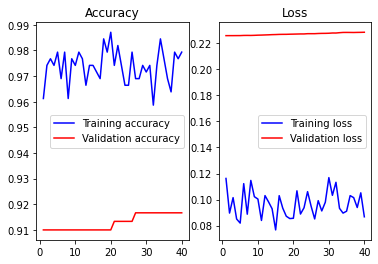

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plot_accuracy_los(accuracy, val_accuracy, loss,val_loss)

In [ ]:
model = keras.models.load_model("/content/drive/MyDrive/schilderijen_app/modellen/Xception_fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset) 
print(f"Test accuracy: {test_acc:.3f}")

10/10 [==============================] - 2s 85ms/step - loss: 0.3872 - accuracy: 0.8733
Test accuracy: 0.873


# Modellen testen

In [ ]:
model = keras.models.load_model("/content/drive/MyDrive/schilderijen_app/modellen/Xception.keras")

1/1 [==============================] - 0s 19ms/step
Computer says: Mondriaan


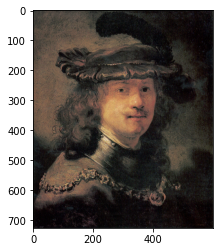

In [ ]:
# Load the image and preprocess it
img = Image.open('/content/drive/MyDrive/Rembrandt/119.jpg')
img_new = img.resize((180, 180))  # Resize the image to 180*180
img_new = np.array(img_new) / 255.0  # Normalize the pixel values

# Make a prediction on the image
predictions = model.predict(np.expand_dims(img_new, axis=0))

# Determine the class with the highest probability
predicted_class = np.argmax(predictions)

# Map the integer class label to a string label
predicted_label = categories[predicted_class]

plt.imshow(img)
print(f"Computer says: {predicted_label}")

In [ ]:
model2 = keras.models.load_model("/content/drive/MyDrive/schilderijen_app/modellen/Xception met data augemtation.keras")

1/1 [==============================] - 1s 1s/step
Computer says: Mondriaan


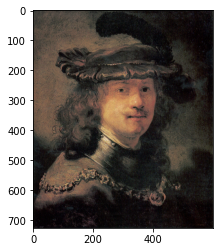

In [ ]:
# Load the image and preprocess it
img = Image.open('/content/drive/MyDrive/Rembrandt/119.jpg')
img_new = img.resize((180, 180))  # Resize the image to 180*180
img_new = np.array(img_new) / 255.0  # Normalize the pixel values

# Make a prediction on the image
predictions = model2.predict(np.expand_dims(img_new, axis=0))

# Determine the class with the highest probability
predicted_class = np.argmax(predictions)

# Map the integer class label to a string label
predicted_label = categories[predicted_class]

plt.imshow(img)
print(f"Computer says: {predicted_label}")

In [ ]:
model3 = keras.models.load_model("/content/drive/MyDrive/schilderijen_app/modellen/Xception_fine_tuning.keras")

1/1 [==============================] - 0s 20ms/step
Computer says: Mondriaan


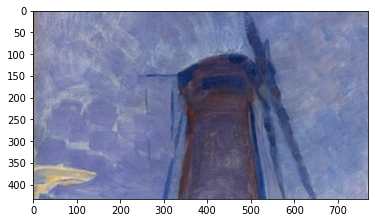

In [ ]:
# Load the image and preprocess it
img = Image.open('/content/drive/MyDrive/Mondriaan/Mondriaans-molen-in-Domburg-in-1908-foto-Omroep-Zeeland.jpg')
img_new = img.resize((180, 180))  # Resize the image to 180*180
img_new = np.array(img_new) / 255.0  # Normalize the pixel values

# Make a prediction on the image
predictions = model3.predict(np.expand_dims(img_new, axis=0))

# Determine the class with the highest probability
predicted_class = np.argmax(predictions)

# Map the integer class label to a string label
predicted_label = categories[predicted_class]

plt.imshow(img)
print(f"Computer says: {predicted_label}")